In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

1. Las de arriba son todas las librerias necesarias, la primera para conectarse a bases de datos SQLite, la segunda para manipulación de datos y anánilisis, la tercera y la cuarta es de datos y gráficos, las otras dos son de operaciones matemáticas y detectar outliers. 

2. El codigo de abajo ayuda a la primera exploracion de las tablas, como cargarlas, mostrar las primeras filas y las dimensiones del dataframe

In [2]:
conn = sqlite3.connect("formula1.db")
tablasnom = [
    "piloto", "escuderia", "componente", "resultado",
    "circuito", "carrera", "vuelta_rapida", "clasificacion", "piloto_escuderia"
]

# Iterate through the tables in tablasnom and analyze only if they exist in the database
for tabla in tablasnom:
        print(f"\n--- Análisis de la tabla: {tabla} ---")
        df = pd.read_sql_query(f"SELECT * FROM {tabla}", conn)
        
        print("\nPrimeras filas:")
        print(df.head())
        
        print("\nTamaño del dataset (filas, columnas):")
        print(df.shape)
        
        print("\nNombres de las columnas:")
        print(df.columns.tolist())
        
        print("\nTipos de datos por columna:")
        print(df.dtypes)
else:
        print(f"\n⚠️ La tabla '{tabla}' no existe en la base de datos.")


--- Análisis de la tabla: piloto ---

Primeras filas:
   piloto_id    nombre   apellido fecha_nacimiento nacionalidad  \
0          1   Charles  Ricciardo       2001-02-11       France   
1          2    Carlos     Bottas       1998-05-29       Monaco   
2          3  Fernando    Russell       1993-05-20           UK   
3          4  Fernando     Bottas       1974-08-22      Finland   
4          5     Lewis     Bottas       1995-10-12      Germany   

   experiencia_años  altura  peso  agresividad  consistencia  
0                26    1.92  87.7            2            10  
1                10    1.68  78.3           10             9  
2                 7    1.66  82.6            7            10  
3                25    1.69  81.7            7            10  
4                 6    1.71  74.5            9             5  

Tamaño del dataset (filas, columnas):
(150, 10)

Nombres de las columnas:
['piloto_id', 'nombre', 'apellido', 'fecha_nacimiento', 'nacionalidad', 'experiencia_años

3. Limpieza de datos 
Se eliminan datos duplicados, y se identifian valores nulos y posibles errores. Aparte se itenta convertir columnas que tengan nombre de "fecha" a datetime

In [3]:
for tabla in tablasnom:
    print(f"\n--- Limpieza de la tabla: {tabla} ---")
    df = pd.read_sql_query(f"SELECT * FROM {tabla}", conn)

    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    duplicados = df.duplicated().sum()
    print(f"\nDuplicados encontrados: {duplicados}")
    if duplicados > 0:
        df = df.drop_duplicates()
        print("Duplicados eliminados.")

    for col in df.select_dtypes(include="object").columns:
        ejemplos = df[col].dropna().unique()
        for valor in ejemplos[:5]:
            if isinstance(valor, str) and ("=" in valor or any(char.isdigit() for char in valor if valor.count(" ") < 2)):
                print(f"⚠️ Posible error en columna '{col}': '{valor}'")
    for col in df.columns:
        if "fecha" in col.lower():
            try:
                df[col] = pd.to_datetime(df[col])
                print(f"✔ Columna '{col}' convertida a datetime.")
            except:
                print(f"❌ No se pudo convertir '{col}' a datetime.")
print("\nTipos de datos finales:")
print(df.dtypes)



--- Limpieza de la tabla: piloto ---

Valores nulos por columna:
piloto_id           0
nombre              0
apellido            0
fecha_nacimiento    0
nacionalidad        0
experiencia_años    0
altura              0
peso                0
agresividad         0
consistencia        0
dtype: int64

Duplicados encontrados: 0
⚠️ Posible error en columna 'fecha_nacimiento': '2001-02-11'
⚠️ Posible error en columna 'fecha_nacimiento': '1998-05-29'
⚠️ Posible error en columna 'fecha_nacimiento': '1993-05-20'
⚠️ Posible error en columna 'fecha_nacimiento': '1974-08-22'
⚠️ Posible error en columna 'fecha_nacimiento': '1995-10-12'
✔ Columna 'fecha_nacimiento' convertida a datetime.

--- Limpieza de la tabla: escuderia ---

Valores nulos por columna:
escuderia_id         0
nombre               0
nacionalidad         0
año_fundacion        0
presupuesto_anual    0
director_tecnico     0
dtype: int64

Duplicados encontrados: 0
⚠️ Posible error en columna 'nombre': 'Escuderia 1'
⚠️ Posible error e

4. Analisis estadistico y vista general 
Obtiene todas las tablas del codigo y hace un analisis estadistico y visual de estas tablas, en las columnas numericas y las categoricas


📘 Analizando tabla: piloto

Primeras filas:
   piloto_id    nombre   apellido fecha_nacimiento nacionalidad  \
0          1   Charles  Ricciardo       2001-02-11       France   
1          2    Carlos     Bottas       1998-05-29       Monaco   
2          3  Fernando    Russell       1993-05-20           UK   
3          4  Fernando     Bottas       1974-08-22      Finland   
4          5     Lewis     Bottas       1995-10-12      Germany   

   experiencia_años  altura  peso  agresividad  consistencia  
0                26    1.92  87.7            2            10  
1                10    1.68  78.3           10             9  
2                 7    1.66  82.6            7            10  
3                25    1.69  81.7            7            10  
4                 6    1.71  74.5            9             5  

Tamaño del dataset:
(150, 10)

Columnas:
['piloto_id', 'nombre', 'apellido', 'fecha_nacimiento', 'nacionalidad', 'experiencia_años', 'altura', 'peso', 'agresividad', 'consis

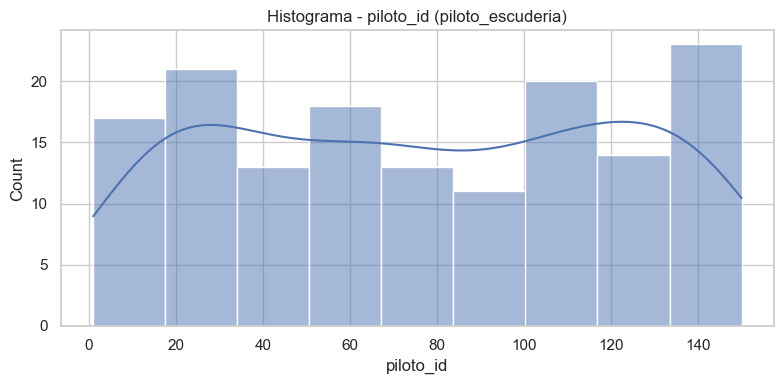

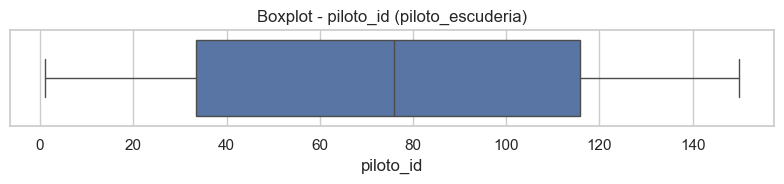

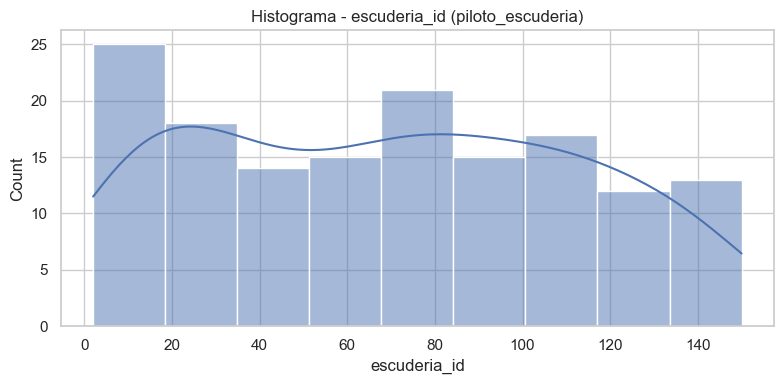

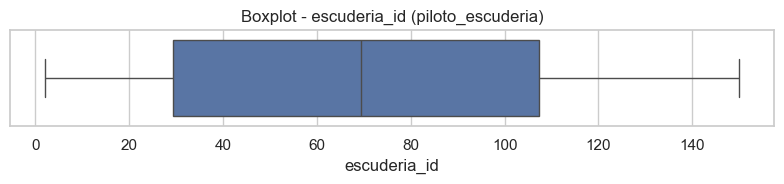


📋 Frecuencia de 'fecha_inicio':
fecha_inicio
2023-06-02    2
2004-08-13    1
1991-12-23    1
2007-10-20    1
2013-07-24    1
             ..
2015-03-29    1
2024-07-06    1
2018-04-28    1
1990-08-13    1
2003-05-01    1
Name: count, Length: 149, dtype: int64


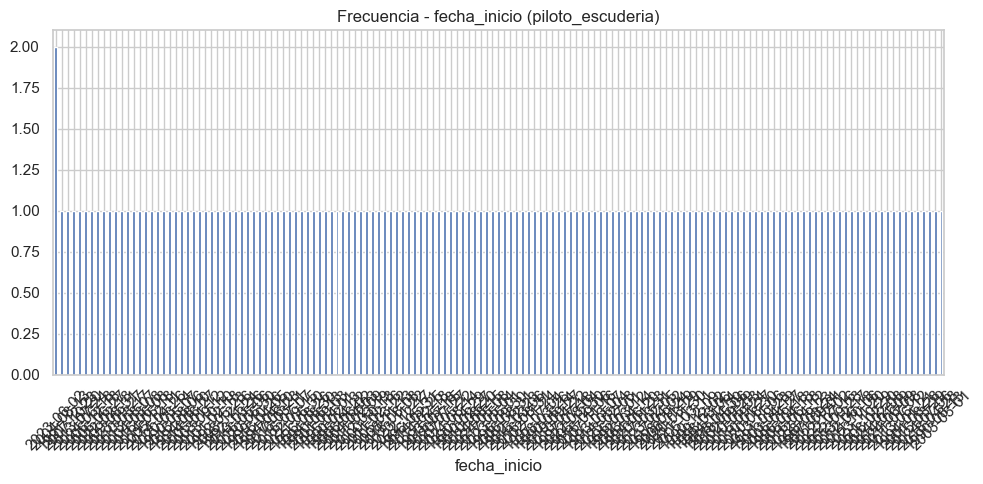


📋 Frecuencia de 'fecha_fin':
fecha_fin
2006-11-27    2
2021-05-09    1
2022-06-17    1
2022-02-03    1
2024-07-08    1
             ..
2019-08-02    1
2025-04-27    1
2022-05-24    1
2002-08-11    1
2008-07-03    1
Name: count, Length: 149, dtype: int64


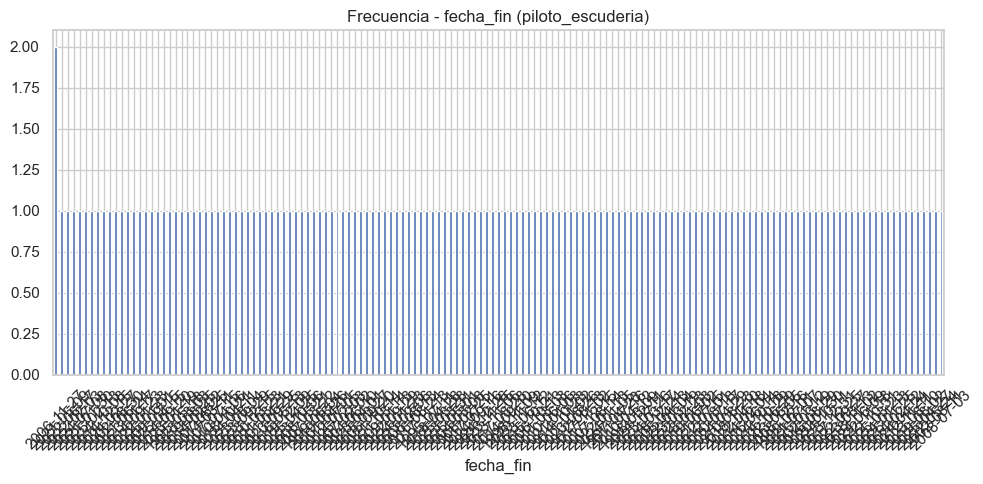

In [4]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
table_names = tables['name'].tolist()

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

for table in table_names:
    print(f"\n📘 Analizando tabla: {table}")
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    
    print("\nPrimeras filas:")
    print(df.head())
    
    print("\nTamaño del dataset:")
    print(df.shape)
    
    print("\nColumnas:")
    print(df.columns.tolist())
    
    print("\nTipos de datos:")
    print(df.dtypes)

    print("\nValores nulos por columna:")
    print(df.isnull().sum())
    
    print("\nDuplicados:")
    print(df.duplicated().sum())

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
if not numeric_cols.empty:
        print("\n📊 Estadísticas descriptivas (numéricas):")
        print(df[numeric_cols].describe())

        for col in numeric_cols:
              plt.figure(figsize=(8, 4))
              sns.histplot(df[col].dropna(), kde=True)
              plt.title(f'Histograma - {col} ({table})')
              plt.xlabel(col)
              plt.tight_layout()
              plt.show()
              
              plt.figure(figsize=(8, 2))
              sns.boxplot(x=df[col].dropna())
              plt.title(f'Boxplot - {col} ({table})')
              plt.xlabel(col)
              plt.tight_layout()
              plt.show()

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(f"\n📋 Frecuencia de '{col}':")
        print(df[col].value_counts(dropna=False))
        
        plt.figure()
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Frecuencia - {col} ({table})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

5.  Detecta los outliers 
Detecta si hay valores externos y da una recomendacion en caso de que si se encuentren 


--- Outliers en la tabla: piloto ---

Columna: piloto_id


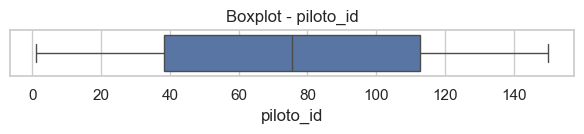

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: experiencia_años


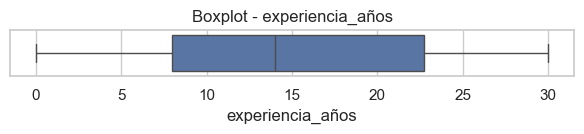

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: altura


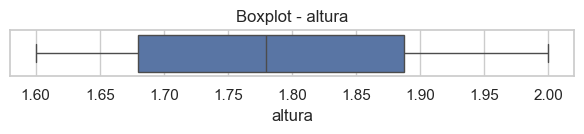

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: peso


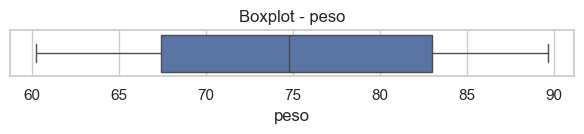

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: agresividad


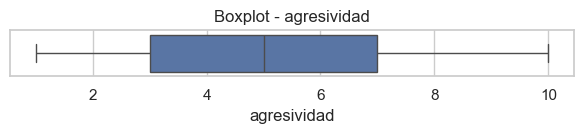

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: consistencia


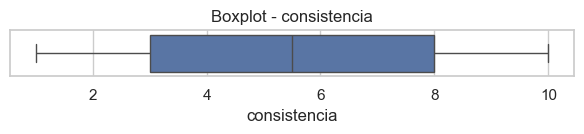

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: sqlite_sequence ---

Columna: seq


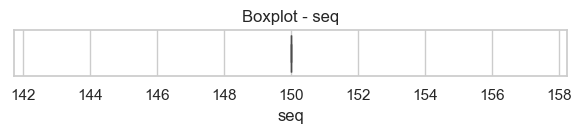

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: escuderia ---

Columna: escuderia_id


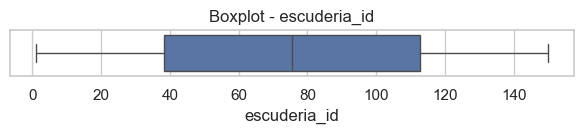

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: año_fundacion


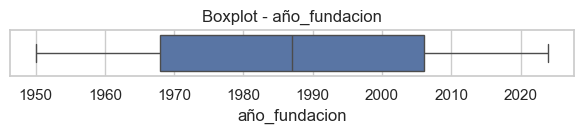

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: presupuesto_anual


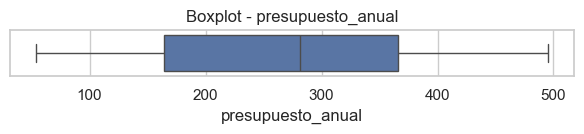

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: componente ---

Columna: componente_id


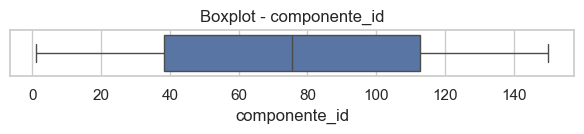

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: escuderia_id


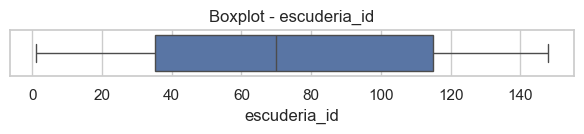

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: temporada


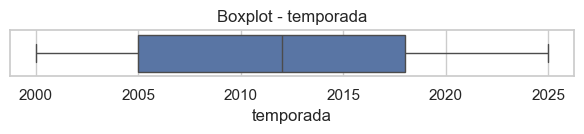

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: eficiencia


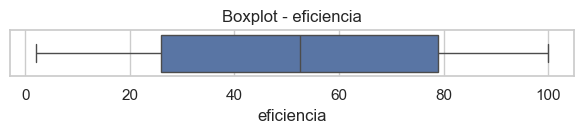

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: fiabilidad


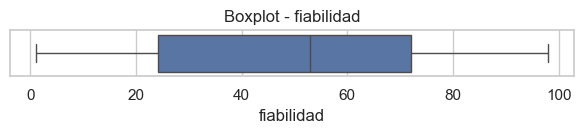

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: resultado ---

Columna: resultado_id


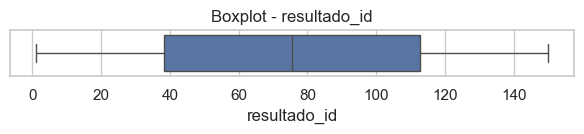

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: carrera_id


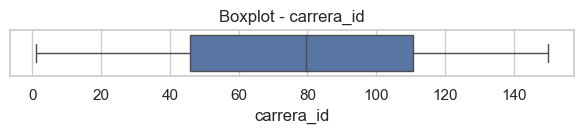

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: piloto_id


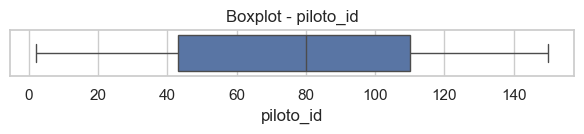

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: escuderia_id


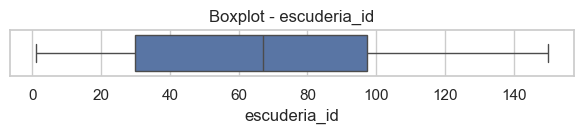

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: posicion_salida


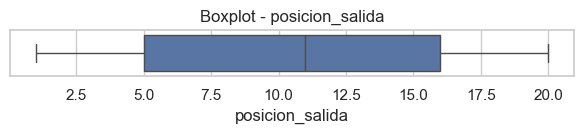

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: posicion_final


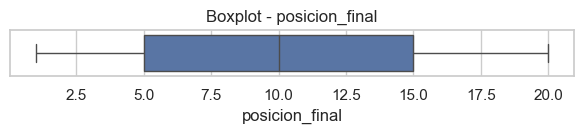

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: puntos_obtenidos


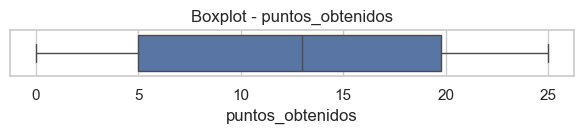

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: vueltas_completadas


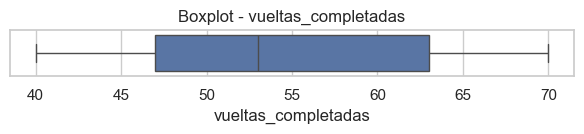

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: mejor_vuelta


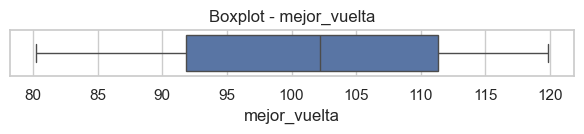

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: numero_paradas


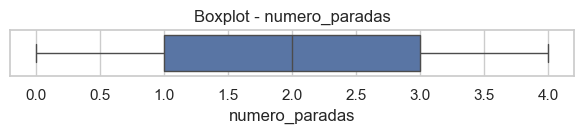

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: circuito ---

Columna: circuito_id


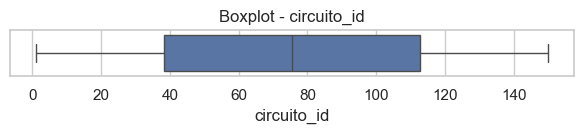

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: longitud_km


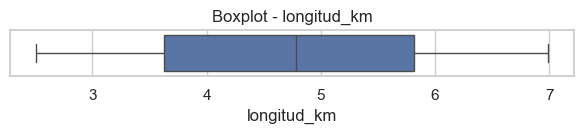

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: curvas


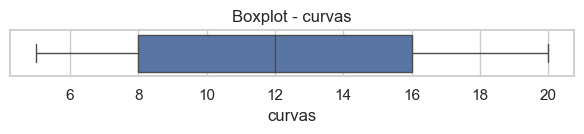

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: record_vuelta


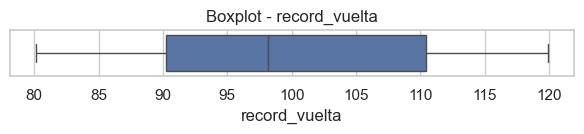

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: altitud


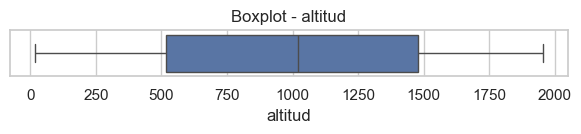

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: aspereza


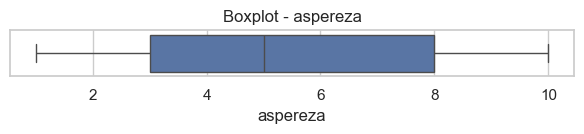

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: carrera ---

Columna: carrera_id


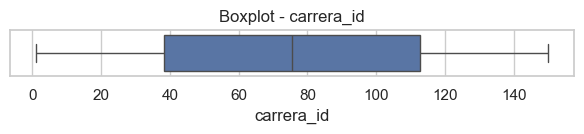

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: circuito_id


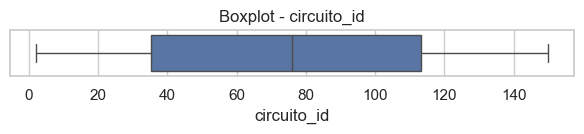

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: temporada


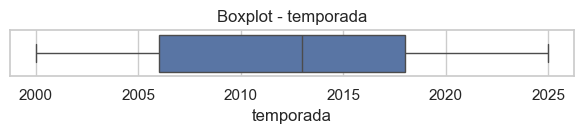

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: condiciones_climaticas


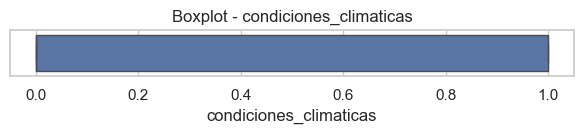

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: temperatura_ambiente


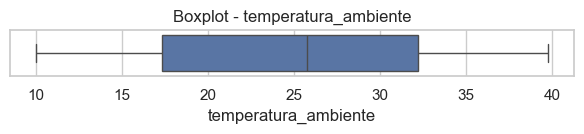

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: temperatura_pista


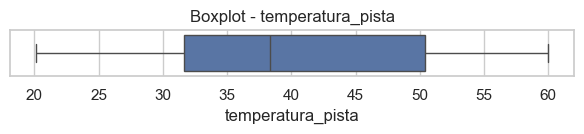

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: humedad


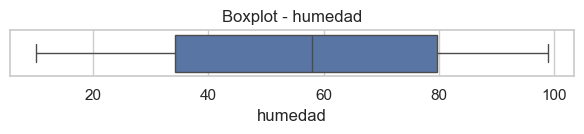

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: vuelta_rapida ---

Columna: vuelta_id


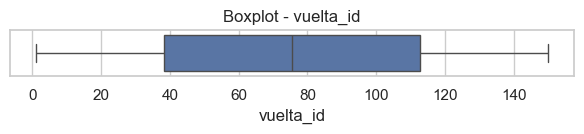

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: resultado_id


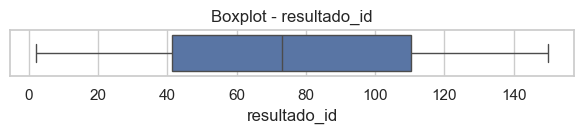

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: numero_vuelta


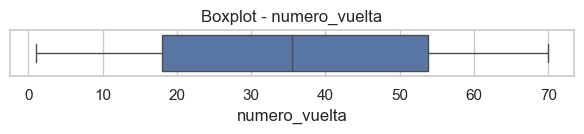

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: tiempo_vuelta


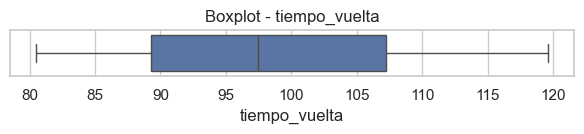

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: posicion_en_vuelta


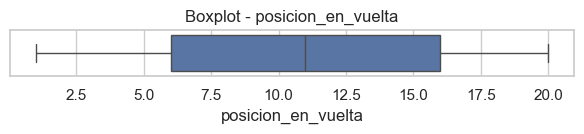

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: diferencia_con_lider


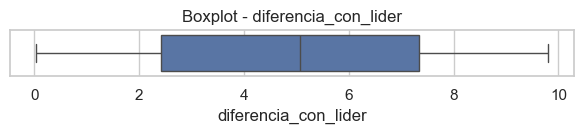

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: clasificacion ---

Columna: clasificacion_id


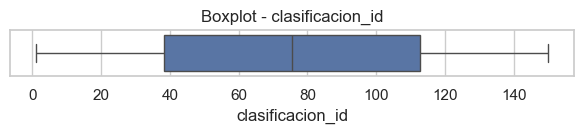

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: carrera_id


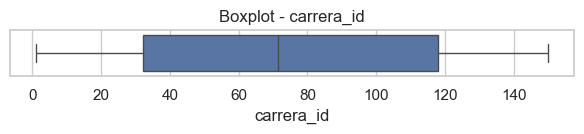

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: piloto_id


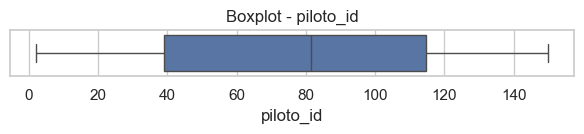

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: tiempo_q1


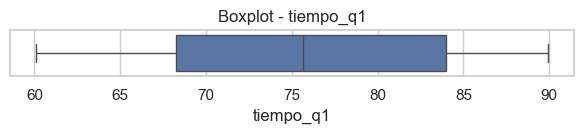

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: tiempo_q2


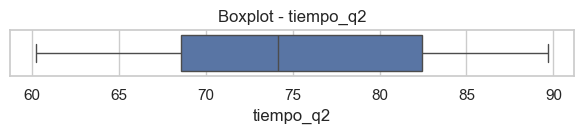

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: tiempo_q3


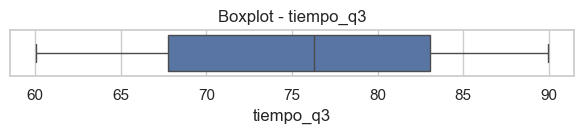

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: posicion_final


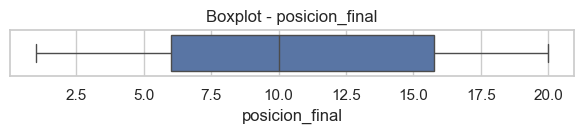

Outliers por IQR: 0
Outliers por Z-Score: 0

--- Outliers en la tabla: piloto_escuderia ---

Columna: piloto_id


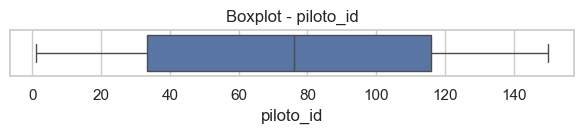

Outliers por IQR: 0
Outliers por Z-Score: 0

Columna: escuderia_id


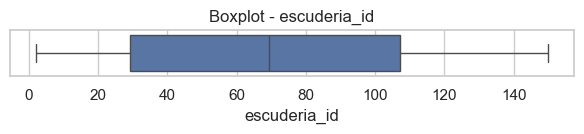

Outliers por IQR: 0
Outliers por Z-Score: 0


In [5]:
tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

for tabla in tablas:
    df = pd.read_sql(f"SELECT * FROM {tabla}", conn)
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    print(f"\n--- Outliers en la tabla: {tabla} ---")

    for col in num_cols:
        print(f"\nColumna: {col}")

        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df[col].dropna())
        plt.title(f"Boxplot - {col}")
        plt.tight_layout()
        plt.show()

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers_iqr = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"Outliers por IQR: {len(outliers_iqr)}")

        col_z = zscore(df[col].dropna())
        outliers_z = np.where(np.abs(col_z) > 3)[0]
        print(f"Outliers por Z-Score: {len(outliers_z)}")
        
    if len(outliers_iqr) > 0:
            print("⚠️ Recomendación: revisar estos valores. Podrían ser errores o casos extremos válidos.")


6. Correlacion de variables 
Carga y selecciona variables númericas, y crea un mapa de calor con las correlaciones, igual que una matriz de dispersión 

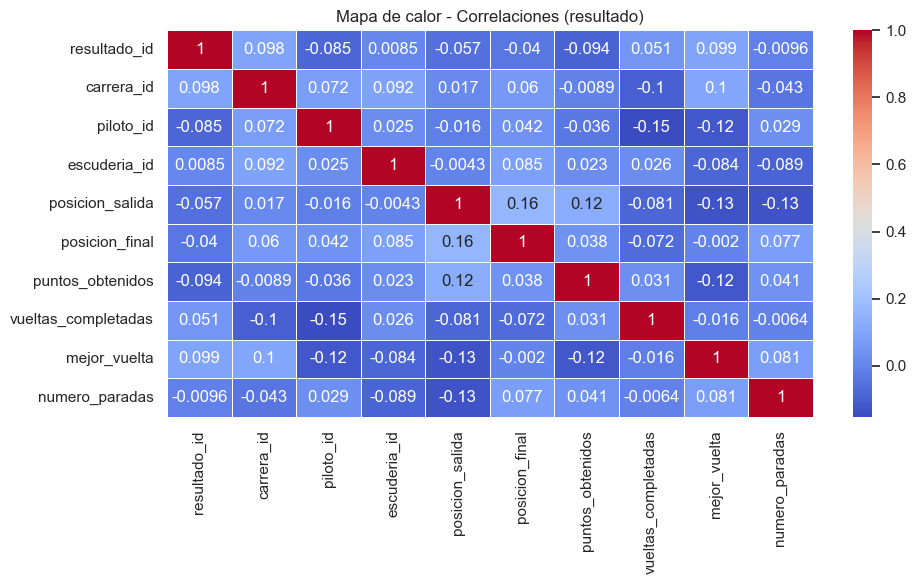

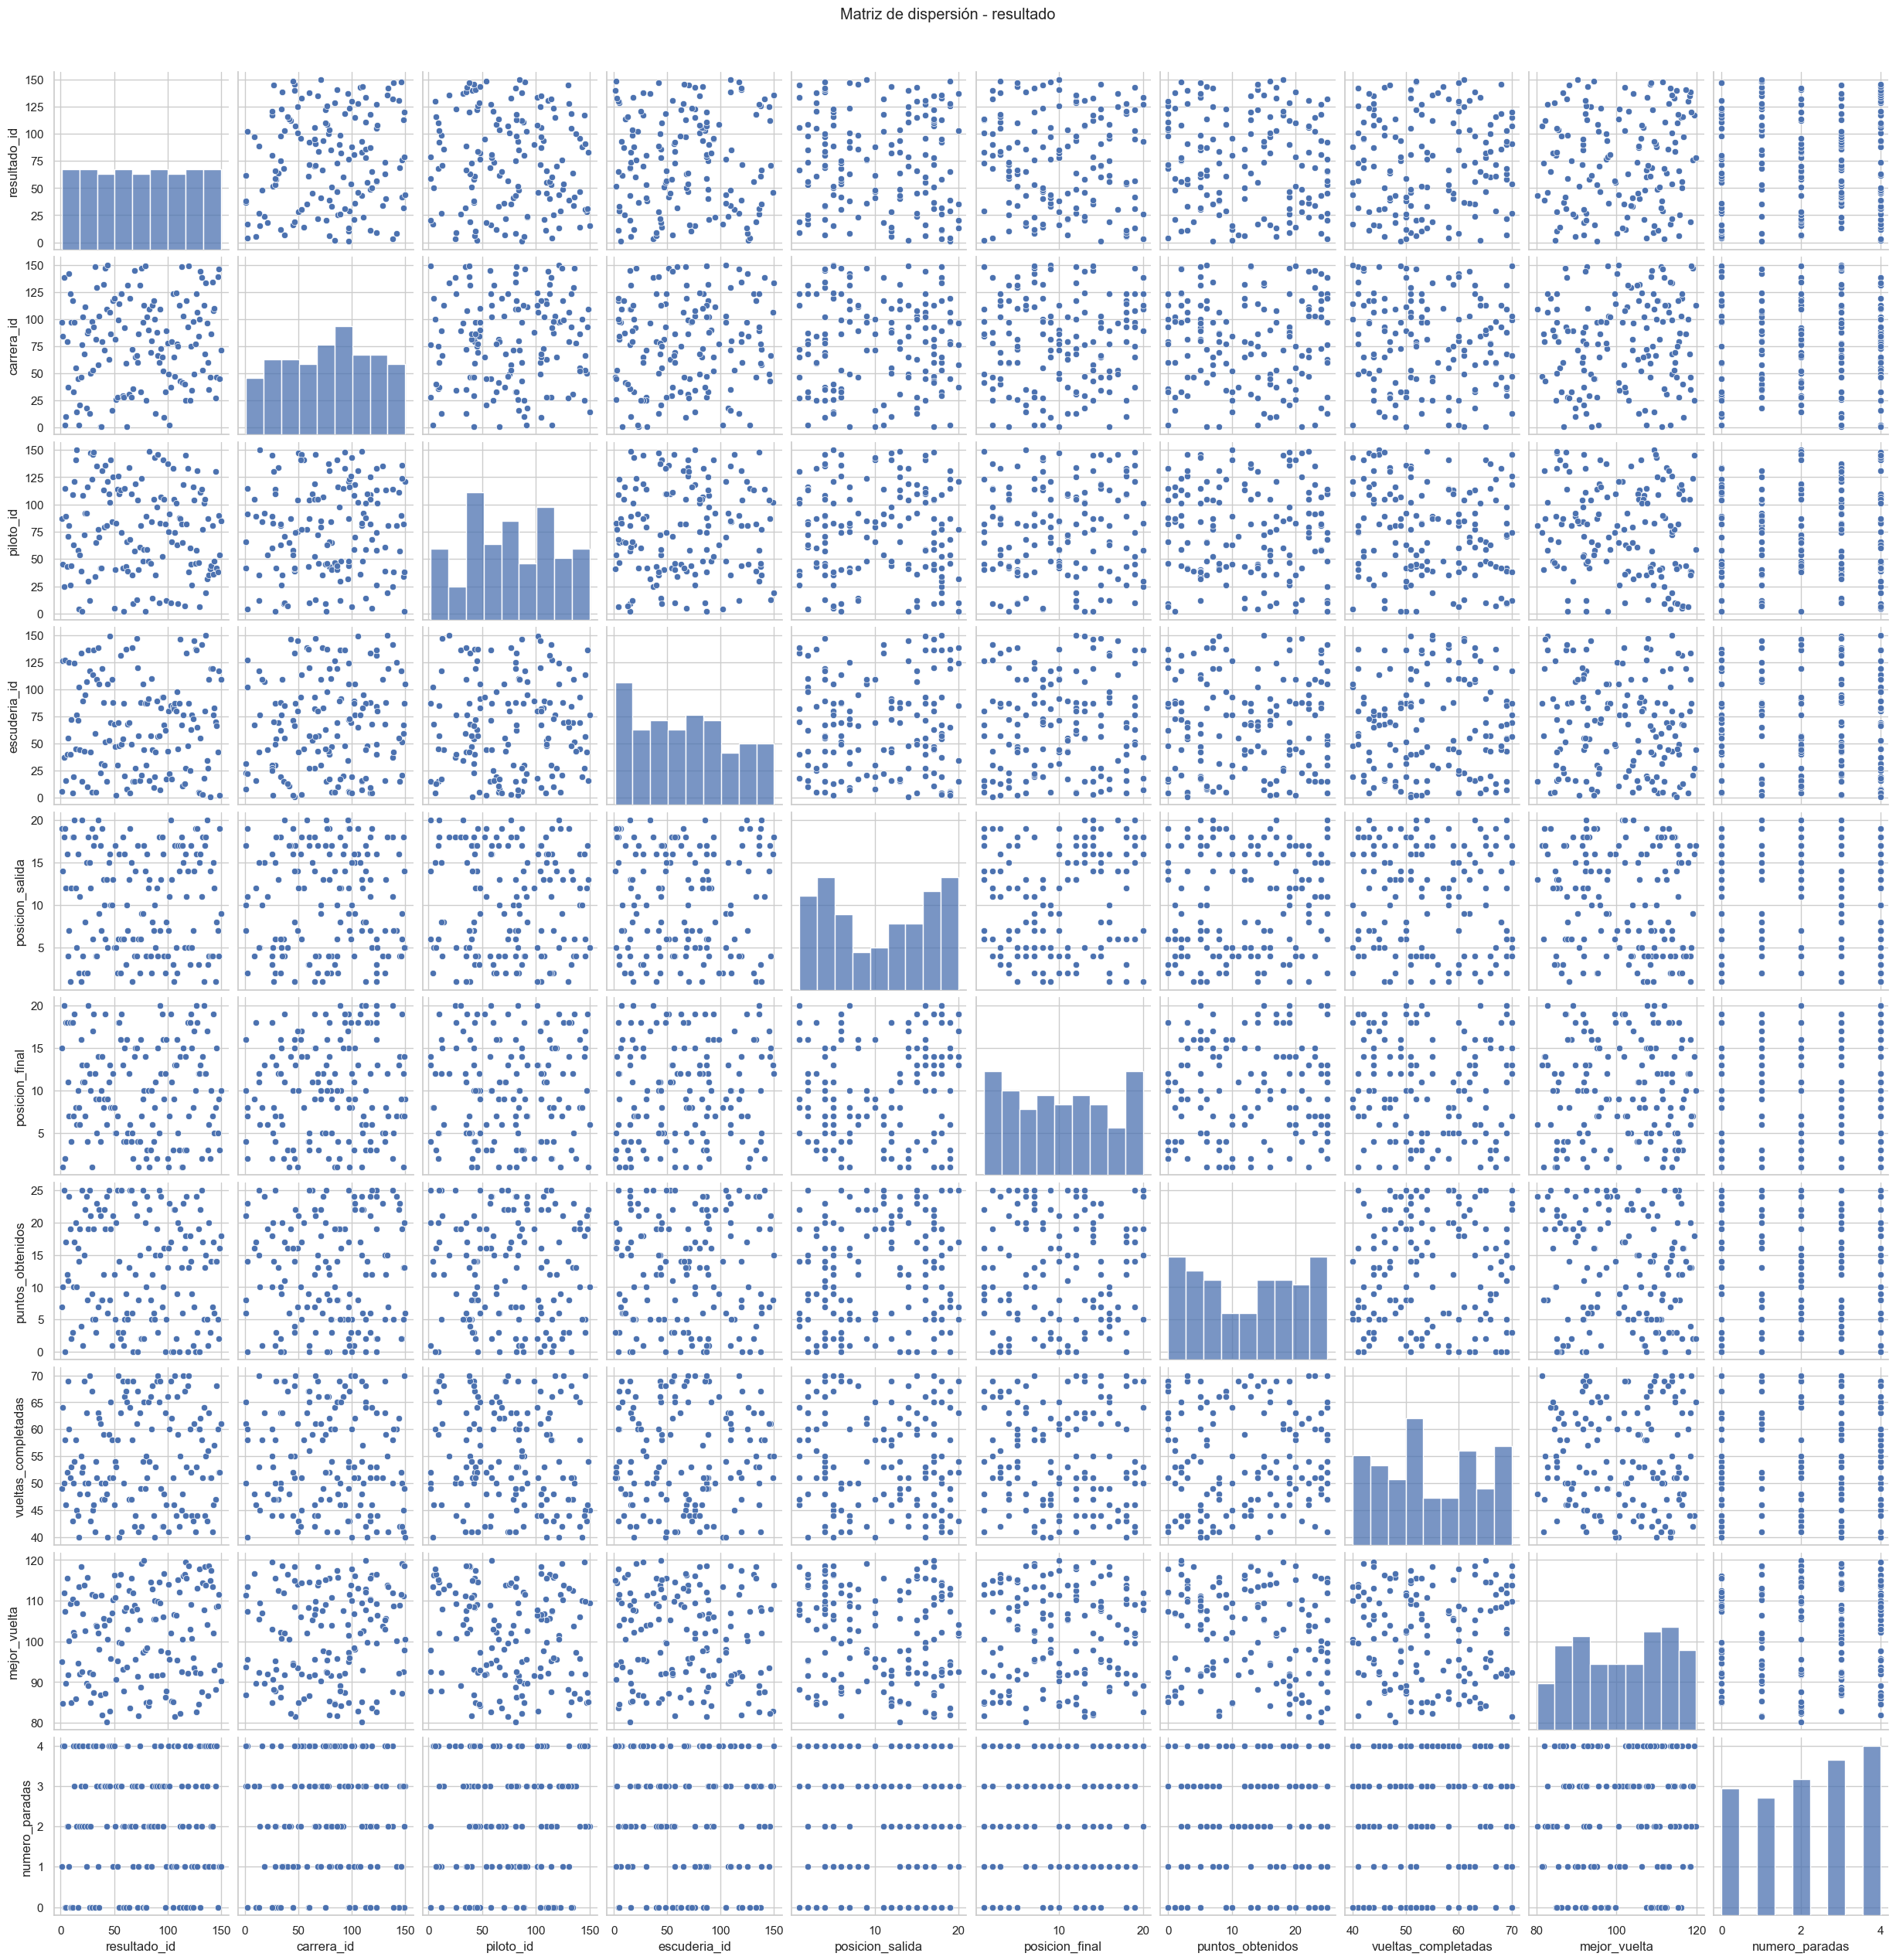

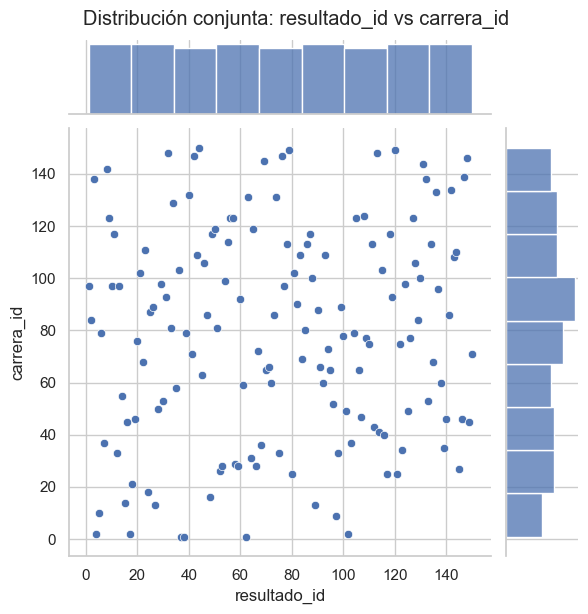

In [6]:
tabla = "resultado" 
df = pd.read_sql(f"SELECT * FROM {tabla}", conn)

num_df = df.select_dtypes(include=["float64", "int64"])

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title(f"Mapa de calor - Correlaciones ({tabla})")
plt.tight_layout()
plt.show()

# Matriz de dispersión
sns.pairplot(num_df)
plt.suptitle(f"Matriz de dispersión - {tabla}", y=1.02)
plt.show()

# Gráfico de distribución conjunta (eligiendo dos variables numéricas)
if num_df.shape[1] >= 2:
    var1 = num_df.columns[0]
    var2 = num_df.columns[1]
    sns.jointplot(data=num_df, x=var1, y=var2, kind="scatter", height=6)
    plt.suptitle(f"Distribución conjunta: {var1} vs {var2}", y=1.02)
    plt.show()
else:
    print("No hay suficientes columnas numéricas para mostrar un jointplot.")

Reflexión Mariano 
Yo aprendi mucho mejor a como manejar una base de datos y al principio fue difícil por tener que usar tantos datos, y es algo que personalmente me falta de mejorar. Para este proyecto aporte haciendo el diagrama con los datos que ibamos a usar para el codigo y documentando el codigo 

Reflexion Elian Yo aprendi de como manejar las graficas con la base datos y a usar las bibliotecas para este codigo